# $\mathcal{H}(1^4)$ No Extra Branching

This notebook addresses the case where each of the four $2$-torsion points has exactly one simple zero above it.

We recall that in $\mathcal{H}(1^4)$, $d_{opt} = 2$.

In [1]:
import re

## Step 1

In [2]:
#This loads all of the 1-cylinder diagrams in H(2,1,1) formatted as python lists

H1_1_cyl_diags = [[[[0, 1, 2, 3], [0, 1, 2, 3]]]]

#This loads all of the functions for processing cylinder diagrams

%run ./ST5_fcns/cyl_diag_fcns.ipynb

H1_1_vertex_data = strat_odd_sc(H1_1_cyl_diags)

There is a unique partition of $4$ into four numbers.

In summary:

$$s_0 = t_0 = 1$$

## Step 2

In [3]:
#This loads all of the standard partition functions needed for nearly every case
#It also loads the partition evaluate function

%run ./ST5_fcns/partition_functions.ipynb

if True:
    create_sc_partition_file((), part_length = 4, t0_range = [1], d_opt = 2,
                             filename_root = 'ST5_data//H_1t4//2_branch_point//partitions//H1_1_part')

#Load the partitions

if True:
    with open('ST5_data//H_1t4//2_branch_point//partitions//H1_1_part', 'r') as file:
        H1_1_part = eval_part(file.read())

ST5_data//H_1t4//2_branch_point//partitions//H1_1_part written


## Step 3

In [4]:
#This loads all of the align_list functions needed for nearly every case
#This includes the align_list evaluate function

%run ./ST5_fcns/align_list_fcns.ipynb

if True:
    for t in [1]:
        align_list_write_file(H1_1_part, H1_1_vertex_data, 
                              'ST5_data//H_1t4//2_branch_point//align_list//H1_1_align_list', 
                              t0 = t)

1 partitions to search


## Step 4

In [5]:
#This loads all of the visible_align_list functions needed for nearly every case

%run ./ST5_fcns/align_list_visible_fcns.ipynb

if True:
    generate_all_align_list_visible_files([1], [1], 2, 
                                          'ST5_data//H_1t4//2_branch_point//', 
                                          'align_list//H1_1_align_list_', 
                                          'align_list_visible//H1_1_align_list_')

total_list generated
ST5_data//H_1t4//2_branch_point//align_list//H1_1_align_list_1 read
1 configurations to search
ST5_data//H_1t4//2_branch_point//align_list_visible//H1_1_align_list_1_visible_1 written


## Step 5

In [6]:
#At this point, none of the files above need to be loaded for this to run.
#Once the files above are generated, the file sizes are small enough that these can be loaded on the fly.

#This loads all of the visible_align_list functions needed for nearly every case

%run ./ST5_fcns/combine_align_list_visible_fcns.ipynb

if True:
    combine_align_list_visible_write_file(s_range = [1], 
                                          s_filename_root = 'align_list_visible//H1_1_align_list_', 
                                          t_range = [1], 
                                          t_filename_root = 'align_list_visible//H1_1_align_list_',
                                          d_opt = 2, 
                                          root_dir = 'ST5_data//H_1t4//2_branch_point//')

ST5_data//H_1t4//2_branch_point//align_list_visible//H1_1_align_list_1_visible_1 read
ST5_data//H_1t4//2_branch_point//align_list_visible//H1_1_align_list_1_visible_1 read
8*8=64 combinations to check
admissible_list written with 64 elements


## Step 6

In [7]:
#This loads all of the vertical permutation check functions needed for nearly every case
#This function can be run once admissible_list is written and without needing to load any other file

%run ./ST5_fcns/vert_perm_check_fcns.ipynb

if True:
    vert_perm_check_file(2, 'ST5_data//H_1t4//2_branch_point//')

admissible_list read with 64 candidates
admissible_list_vert_perm_check written with 64 elements


In [8]:
#This checks that all (both) of the vertical permutations have the correct length of 2*d_opt

if True:
    all_vert_perm_check_file(2, 'ST5_data//H_1t4//2_branch_point//')

admissible_list_vert_perm_check read with 64 candidates
admissible_list_all_vert_perm_check written with 64 elements


## Step 7

In [9]:
%run ./ST5_fcns/slope_test_fcn.ipynb

if True:
    final_list = slope_test(2, 'ST5_data//H_1t4//2_branch_point//')

admissible_list_all_vert_perm_check read with 64 candidates
vert_perm_total_1 produced with 64 elements
vert_perm_total_d_opt produced with 64 elements


## Step 8

In [10]:
def make_origamis(d_opt, filename_root):
    admissible_list_vert_perm_check_filename = filename_root + 'admissible_list_all_vert_perm_check'
    with open(admissible_list_vert_perm_check_filename, 'r') as file:
        admissible_list_all_vert_perm_check = eval(file.read())
        print('admissible_list_all_vert_perm_check read with ' 
              + str(len(admissible_list_all_vert_perm_check)) + ' candidates')
    vert_perm_total = []
    for surf_coord in admissible_list_all_vert_perm_check:
        vert_perms = all_vert_perm_check(surf_coord, d_opt, trigger_check = False)
        vert_perm_total.append([tuple(i) for i in vert_perms])
    return vert_perm_total

In [11]:
total_list = make_origamis(2, 'ST5_data//H_1t4//2_branch_point//')

admissible_list_all_vert_perm_check read with 64 candidates


In [12]:
from surface_dynamics.all import *

def origami_from_list(j, d_opt = 2):
    h = str(tuple(range(1,2*d_opt+1))) + str(tuple(range(2*d_opt+1, 4*d_opt+1)))
    v = str(total_list[j][0]) + str(total_list[j][1])
    return Origami(h,v)

In [13]:
o1 = origami_from_list(0)
reduced_list = [o1]
for j in range(1,36):
    o2 = origami_from_list(j)
    if not (o1.is_isomorphic(o2) and o2.is_isomorphic(o1)):
        reduced_list += [o2]

reduced_list

[(1,2,3,4)(5,6,7,8)
 (1,5,3,7)(2,8,4,6)]

Stratum is H_3(1^4)
Sum of Lyapunov exponents is 1


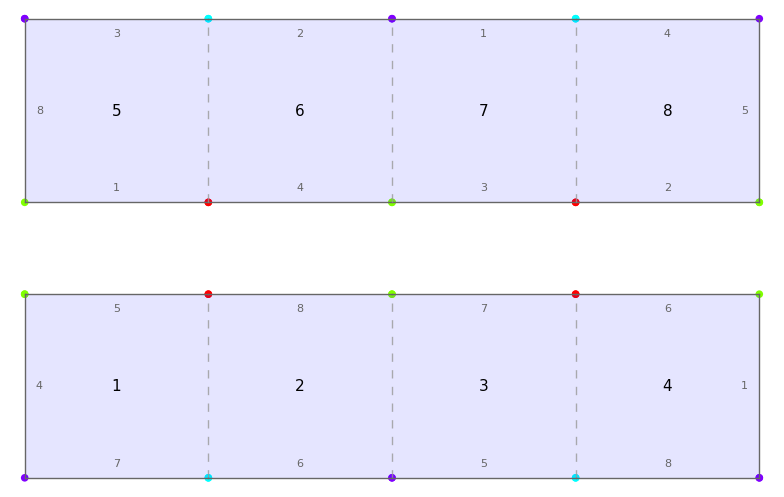

In [14]:
for surface in reduced_list:
    print('Stratum is ' + str(surface.stratum()))
    print('Sum of Lyapunov exponents is ' + str(surface.sum_of_lyapunov_exponents()))
    surface.show()